In [7]:
import matplotlib.pyplot as plt
import math


points = [(-0.7096385587742144, 0.30318210473778096),
          (-0.3411749143856768, -0.5820783370357212),
          (-0.24157476725965044, -0.8540232239904011),
          (-0.20113191097073857, -0.9160599850827003),
          (0.11922377929535544, -0.43052135777977907),
          (0.12830059981936315, 0.7990600791223001), 
          (0.2949239751116792, -0.09656361468997576),
          (0.3428001573773529, -0.689607865440441),
          (0.3695229987051891, 0.1572762886737451),
          (0.48178920664036196, -0.45543224191135634)] 

In [8]:
def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  # Collinear
    elif val > 0:
        return 1 # Clockwise
    else:
        return -1 # counterclockwise

In [9]:
def distance(point1, point2):
    x1 = point1[0]
    y1 = point1[1]
    x2 = point2[0]
    y2 = point2[1] 
    return math.sqrt((y2-y1)**2 + (x2-x1)**2)

In [10]:
def get_merge_hull(left,right):
    points = [(point[0], point[1]) for point in left + right]
    hull=[]
    #print("Points in hull : ", points)
    current= min(points, key=lambda point: (point[0], point[1]))
    #current = points[0]
    #print(current, ' current')

    while True:
        hull.append(current)
        next_point=points[0]
        for point in points:
            orient = orientation(current, next_point, point)
            #print('orientation ', orient)
            if next_point==current or orient == 1 or (orient==0 and distance(current, point) > distance(current,next_point)):
                next_point = point
                #print(next_point, ' next points')
        current = next_point
        if current == hull[0]:
            break
    return hull
    
    

In [11]:
#sorted_points = sorted(points, key=lambda point: point[0])
def compute_hull(points):
    if len(points) <= 3:
       return points
    #print("points ",len(points), points)
    
    mid = len(points)//2
    #print(len(points), mid)
    
    left_half = points[:mid]
    right_half = points[mid:]
        
    final_hull = get_merge_hull(left_half, right_half)   
    return final_hull
  

result  [(-0.7096385587742144, 0.30318210473778096), (-0.24157476725965044, -0.8540232239904011), (-0.20113191097073857, -0.9160599850827003), (0.3428001573773529, -0.689607865440441), (0.48178920664036196, -0.45543224191135634), (0.3695229987051891, 0.1572762886737451), (0.12830059981936315, 0.7990600791223001)]


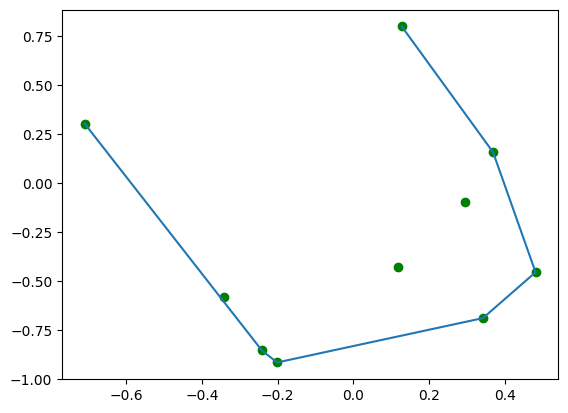

In [12]:
result = compute_hull(points)
print("result ", result)
plt.scatter(list(map(lambda x: x[0], points)), list(map(lambda y: y[1], points)), color='green', marker='o', label='Points')
plt.plot(list(map(lambda x: x[0], result)),list(map(lambda y: y[1], result)), label="Line")
